In [35]:
import pandas as pd
import numpy as np
import wfdb
import ast
import json


In [16]:

# print('xtxtxt')
# def load_raw_data(df, sampling_rate, path):
#     if sampling_rate == 100:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
#     else:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
#     data = np.array([signal for signal, meta in data])
#     return data

# path = '../EKG DATA/'
# sampling_rate=100

# # load and convert annotation data
# Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
# Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# # Load raw signal data
# X = load_raw_data(Y, sampling_rate, path)
# print('xrxrxr')
# # Load scp_statements.csv for diagnostic aggregation
# agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
# agg_df = agg_df[agg_df.diagnostic == 1]

# def aggregate_diagnostic(y_dic):
#     tmp = []
#     for key in y_dic.keys():
#         if key in agg_df.index:
#             tmp.append(agg_df.loc[key].diagnostic_class)
#     return list(set(tmp))

# # Apply diagnostic superclass
# Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# # Split data into train and test
# test_fold = 10
# # Train
# X_train = X[np.where(Y.strat_fold != test_fold)]
# y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# # Test
# X_test = X[np.where(Y.strat_fold == test_fold)]
# y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass



xtxtxt


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\SHANNON\\Desktop\\EKG DATA\\records100\\02000\\02000_lr.hea'

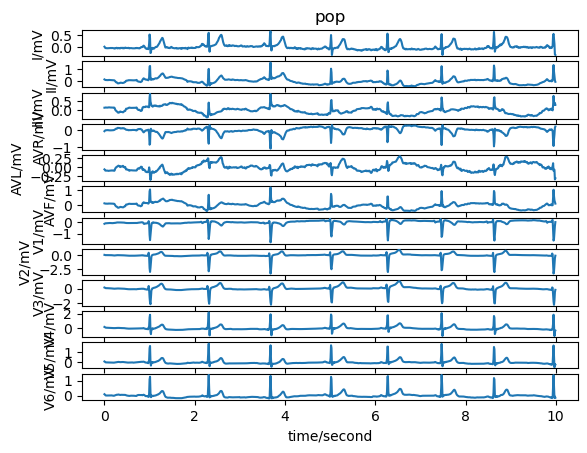

In [7]:
record = wfdb.rdrecord('records100/00000/00002_lr')

wfdb.plot_wfdb(record=record, title="pop")


In [5]:
#"filename_lr" contations the path to each record.
#"scp_codes" has the clasification of normal or not 

ekg_db = pd.read_csv("ptbxl_database.csv")
ekg_db.head(3)

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr


In [63]:
cleaned_ekg_db = ekg_db[["filename_lr", "scp_codes"]]
for i in range(len(cleaned_ekg_db)):
       cleaned_ekg_db["scp_codes"][i] = cleaned_ekg_db["scp_codes"][i].split("'")[1]
     

cleaned_ekg_db.head(3)

C:\Users\SHANNON\AppData\Local\Temp\ipykernel_15996\538229641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["scp_codes"][i] = cleaned_ekg_db["scp_codes"][i].split("'")[1]


,filename_lr,scp_codes
0,records100/00000/00001_lr,NORM
1,records100/00000/00002_lr,NORM
2,records100/00000/00003_lr,NORM


In [62]:
cleaned_ekg_db = cleaned_ekg_db.iloc[:1988]
cleaned_ekg_db.head(3)

,filename_lr,scp_codes
0,records100/00000/00001_lr,NORM
1,records100/00000/00002_lr,NORM
2,records100/00000/00003_lr,NORM
